In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

1.12.0


### MNIST dataset

In [6]:
(X_train, y_train), (X_test, y_test)= keras.datasets.mnist.load_data()

X_train= X_train[:1000].reshape(-1, 28*28) / 255.0
X_test= X_test[:1000].reshape(-1, 28*28) / 255.0

y_train= y_train[:1000]
y_test= y_test[:1000]

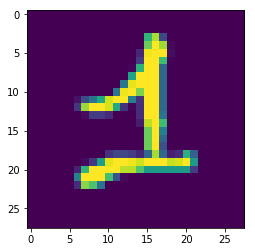

In [11]:
plt.imshow(X_train[24].reshape((28,28)))

### Define a model

In [14]:
def create_model():
    model= keras.Sequential([
        keras.layers.Dense(512, activation= tf.nn.relu, input_shape= (28*28, )),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation= tf.nn.softmax)
    ])
    
    model.compile(optimizer= tf.train.AdamOptimizer(),
                 loss= tf.keras.losses.sparse_categorical_crossentropy,
                 metrics= ['accuracy'])
    
    return model

In [16]:
model= create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Save checkpoint during training

In [18]:
import os
checkpoint_path= 'training_1/cp.ckpt'
checkpoing_dir= os.path.dirname(checkpoint_path)

#### Checkpoing callback

In [19]:
cp_callback= tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                               save_weights_only= True,
                                               verbose= 2)

In [20]:
model= create_model()

In [21]:
model.fit(X_train, y_train,
         epochs= 10,
         validation_data= (X_test, y_test),
         callbacks= [cp_callback])

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
 864/1000 [========================>.....] - ETA: 0s - loss: 1.2551 - acc: 0.6343
Epoch 00001: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1649 - acc: 0.6630 - val_loss: 0.7176 - val_acc: 0.7860
Epoch 2/10
 992/1000 [============================>.] - ETA: 0s - loss: 0.4245 - acc: 0.8841
Epoch 00002: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 463us/step - loss: 0.4242 - acc: 0.8840 - val_loss: 0.5058 - val_acc: 0.8430
Epoch 3/10
 800/1000 [=======================>......] - ETA: 0s - loss: 0.2931 - acc: 0.9250
Epoch 00003: saving model to training_1/cp.ckpt
1000/1000 [==============================] - 0s 482us/step - loss: 0.2822 - acc: 0.9250 - val_loss: 0.4781 - val_acc: 0.8430
Epoch 4/10
 992/1000 [============================>.] - ETA: 0s - loss: 0.2101 - acc: 0.9496
Epoch 00004: saving model to training_1/cp.ckpt
1000/1000 [====

In [24]:
! dir {checkpoing_dir}

 Volume in drive C has no label.
 Volume Serial Number is 0E0C-78C5

 Directory of C:\Users\10650637\Music\ML\Journey2AI\TensorFlow\training_1

27-11-2018  05:47 PM    <DIR>          .
27-11-2018  05:47 PM    <DIR>          ..
27-11-2018  05:47 PM                71 checkpoint
27-11-2018  05:47 PM         4,889,491 cp.ckpt.data-00000-of-00001
27-11-2018  05:47 PM             1,439 cp.ckpt.index
               3 File(s)      4,891,001 bytes
               2 Dir(s)  160,019,034,112 bytes free


### Restoring on untrained model

In [28]:
new_model= create_model()

In [29]:
loss, acc= new_model.evaluate(X_test, y_test)
print(loss, acc*100.0)

1000/1000 [==============================] - 0s 216us/step
2.317196342468262 12.8


In [30]:
new_model.load_weights(checkpoint_path)

In [31]:
loss, acc= new_model.evaluate(X_test, y_test)
print(loss, acc*100.0)

1000/1000 [==============================] - 0s 78us/step
0.4130855145454407 87.5


### Checkpoing on every 5 epochs

In [32]:
checkpoint_path= 'training_2/cp-{epoch:04d}.ckpt'
checkpoing_dir= os.path.dirname(checkpoint_path)

In [33]:
cp_callback= keras.callbacks.ModelCheckpoint(checkpoint_path,
                                            verbose= 1,
                                            save_weights_only= True,
                                            period= 5)

In [34]:
model= create_model()

In [36]:
model.fit(X_train, y_train,
         epochs= 50,
         callbacks= [cp_callback],
         validation_data= (X_test, y_test),
         verbose= 0)


Epoch 00005: saving model to training_2/cp-0005.ckpt

Epoch 00010: saving model to training_2/cp-0010.ckpt

Epoch 00015: saving model to training_2/cp-0015.ckpt

Epoch 00020: saving model to training_2/cp-0020.ckpt

Epoch 00025: saving model to training_2/cp-0025.ckpt

Epoch 00030: saving model to training_2/cp-0030.ckpt

Epoch 00035: saving model to training_2/cp-0035.ckpt

Epoch 00040: saving model to training_2/cp-0040.ckpt

Epoch 00045: saving model to training_2/cp-0045.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [37]:
! dir {checkpoing_dir}

 Volume in drive C has no label.
 Volume Serial Number is 0E0C-78C5

 Directory of C:\Users\10650637\Music\ML\Journey2AI\TensorFlow\training_2

27-11-2018  05:56 PM    <DIR>          .
27-11-2018  05:56 PM    <DIR>          ..
27-11-2018  05:56 PM                81 checkpoint
27-11-2018  05:56 PM         4,889,514 cp-0005.ckpt.data-00000-of-00001
27-11-2018  05:56 PM             1,439 cp-0005.ckpt.index
27-11-2018  05:56 PM         4,889,514 cp-0010.ckpt.data-00000-of-00001
27-11-2018  05:56 PM             1,439 cp-0010.ckpt.index
27-11-2018  05:56 PM         4,889,514 cp-0015.ckpt.data-00000-of-00001
27-11-2018  05:56 PM             1,439 cp-0015.ckpt.index
27-11-2018  05:56 PM         4,889,514 cp-0020.ckpt.data-00000-of-00001
27-11-2018  05:56 PM             1,439 cp-0020.ckpt.index
27-11-2018  05:56 PM         4,889,514 cp-0025.ckpt.data-00000-of-00001
27-11-2018  05:56 PM             1,439 cp-0025.ckpt.index
27-11-2018  05:56 PM         4,889,514 cp-0030.ckpt.data-00000-of-00001
2

#### Getting the latest model

In [39]:
latest= tf.train.latest_checkpoint(checkpoing_dir)
latest

'training_2\\cp-0050.ckpt'

In [40]:
model= create_model()
model.load_weights(latest)
loss, acc= model.evaluate(X_test, y_test)
print(loss, acc*100.0)

1000/1000 [==============================] - 0s 162us/step
0.46666604006290435 87.7


### Manually save the weights

In [41]:
#Saving
model.save_weights('./checkpoints/shiv_checkpoint')

#Restoring
model= create_model()
model.load_weights('./checkpoints/shiv_checkpoint')

loss, acc= model.evaluate(X_test, y_test)
print(loss, acc* 100.0)

1000/1000 [==============================] - 0s 167us/step
0.46666604006290435 87.7


### Saving the entire model

In [42]:
model= create_model()

In [43]:
#Need to use keras.optimizer to restore optimizer state from HDF5 file
model.compile(optimizer= keras.optimizers.Adam(),
             loss= keras.losses.sparse_categorical_crossentropy,
             metrics= ['accuracy'])

In [44]:
model.fit(X_train, y_train,
         validation_data= (X_test, y_test),
         epochs= 5)

Train on 1000 samples, validate on 1000 samples
Epoch 1/5
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1548 - acc: 0.6720 - val_loss: 0.7076 - val_acc: 0.7730
Epoch 2/5
1000/1000 [==============================] - 0s 495us/step - loss: 0.4204 - acc: 0.8880 - val_loss: 0.5120 - val_acc: 0.8320
Epoch 3/5
1000/1000 [==============================] - 0s 461us/step - loss: 0.2865 - acc: 0.9300 - val_loss: 0.4534 - val_acc: 0.8560
Epoch 4/5
1000/1000 [==============================] - 0s 464us/step - loss: 0.2085 - acc: 0.9500 - val_loss: 0.4301 - val_acc: 0.8680
Epoch 5/5
1000/1000 [==============================] - 0s 487us/step - loss: 0.1646 - acc: 0.9610 - val_loss: 0.4217 - val_acc: 0.8700


In [45]:
model.save('shiv_model.h5')

In [46]:
new_model= keras.models.load_model('shiv_model.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [47]:
loss, acc= model.evaluate(X_test, y_test)
print(loss, acc* 100.0)

1000/1000 [==============================] - 0s 85us/step
0.42165456581115723 87.0


#### To be continued....